# Midterm Exam (part 2) - Computational Physics 2

- When you finish this part, please send the **.ipynb file** via email to wbanda@yachaytech.edu.ec


- This part is open-book and individual. **It includes short application problems.**


- You can call your notebook with your surname, e.g. **name-midterm-p2.ipynb**, and also include your name on the notebook.


## Instructions:

- **Duration: 1 hour, 15 minutes max.**


- Within a single python notebook, solve the following problems using python code:

## Name:

Andres Villares

### 10. (5 points) Initial-value problem: Free fall with a drag force

Consider an object with a mass of $0.4\,\rm kg$ that falls from rest under the influence of gravity (i.e., along the Y axis). The object is also subjected to a drag force that arises from friction with air molecules, so its equation of motion reads:

$$m\frac{d^2y}{dt^2}=-m\,g + b\frac{dy}{dt}$$

where $g = 9.8\,\rm m\,s^{-2}$ and $b = 3.3\times 10^{-2}\,\rm kg\,s^{-1}$. If the starting point of the object is $y(0) = 100\,\rm m$, its initial speed $\dot{y}(0) = 0$, and we are interested in studying its fall during the first $3\,\rm s$ of motion:


**10.1. (1 point)** Find the analytical solution for $y(t)$ using sympy.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sympy import sin, cos

In [2]:
# Define symbols

y = sp.symbols("y", cls = sp.Function)

t = sp.symbols("t")

m = 0.4 #kg

g = 9.8  #m/s^2

b = 3.3 * 10**(-2)  #kg/s


# ODE

diffeq = sp.Eq(m*y(t).diff(t,2), -m*g + b*y(t).diff(t))

ydiff = y(t).diff(t)

display(diffeq)

Eq(0.4*Derivative(y(t), (t, 2)), 0.033*Derivative(y(t), t) - 3.92)

In [3]:
# Solve the ODE using the ics 

result = sp.dsolve(diffeq, y(t), ics = {y(0):100,y(t).diff(t).subs(t, 0): 0},simplify=True)

display(result)


Eq(y(t), 118.787878787879*t - 1439.85307621672*exp(0.0825*t) + 1539.85307621672)

**10.2. (1 point)** Make a plot ($y$ vs. $t$) of the analytical solution $y(t)$.

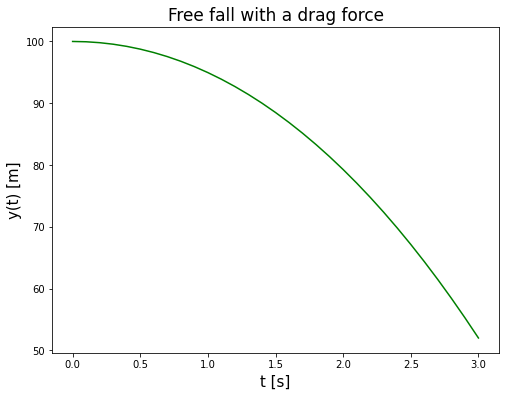

In [4]:
#Extract the solution 

sola = lambda t: 118.787878787879*t - 1439.85307621672*np.exp(0.0825*t) + 1539.85307621672 

# Create a list of values for t from 0 to 3 with a step of 0.1
h_1 = 0.1

t_vals = np.arange(0, 3 + h_1,  h_1)

# Plot the solution
plt.figure(figsize = (8,6))

plt.plot(t_vals, sola(t_vals), "g", label = "Analytical solution")
plt.xlabel('t [s]', size=15)
plt.ylabel('y(t) [m]', size=15)
plt.title('Free fall with a drag force', size=17)
plt.show()

**10.3. (1 point)** Use scipy functions to find the numerical solution for $y(t)$ (choose a RK integrator).

In [5]:
from scipy.integrate import solve_ivp

In [6]:
ode = lambda t, s: np.dot(np.array([[0, 1],[0, b/m]]), s) + np.array([0,-g])

In [7]:
#First we will define a function to calculate the numerical solution

def solver(h_vals):
    
    t_vals = np.arange(0, 3 + h_vals,  h_vals)
    
    sln_num = solve_ivp(ode, [0, 3], [100, 0], method='RK45', t_eval = t_vals)
    
    return sln_num, t_vals

**10.4. (1 point)** Make a plot ($y$ vs. $t$) of the numerical solution plus the analytical solution.

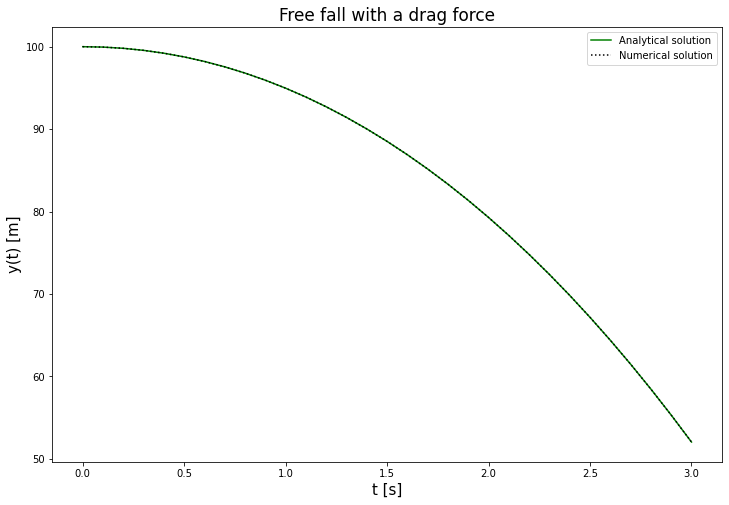

In [8]:
# Plot the solution
plt.figure(figsize = (12,8))

sln_num, t_vals= solver(0.1)

plt.plot(t_vals, sola(t_vals), "g", label = "Analytical solution")
plt.plot(sln_num.t, sln_num.y[0], "black",ls=':', label = "Numerical solution")
#plt.plot(t_vals, sola(t_vals)-sln_num.y[0], "g", label = "Analytical solution")

plt.legend()
plt.xlabel('t [s]', size=15)
plt.ylabel('y(t) [m]', size=15)
plt.title('Free fall with a drag force', size=17)
plt.show()

In [9]:
sola(t_vals)

array([100.        ,  99.95086497,  99.80291754,  99.55533913,
        99.20730438,  98.75798111,  98.20653022,  97.55210568,
        96.79385444,  95.93091639,  94.96242429,  93.88750371,
        92.705273  ,  91.41484317,  90.0153179 ,  88.50579342,
        86.88535848,  85.1530943 ,  83.30807446,  81.34936488,
        79.27602375,  77.08710143,  74.78164044,  72.35867536,
        69.81723277,  67.15633119,  64.374981  ,  61.4721844 ,
        58.4469353 ,  55.2982193 ,  52.02501357])



**10.5. (1 point)** Analyse convergence, i.e., compute and plot the $L_2$-norm errors versus different step sizes.

In [18]:
def L2_norm(h_vals):
    sln_num, t_vals= solver(h_vals)   
    L2 = 0
    for i in range(0,len(t_vals)):  
        val = np.abs(sola(t_vals[i]) - sln_num.y[0][i])
        L2 = L2 + val**2
    L2 = L2 / len(t_vals) 
    L2 = L2**(1/2)
    return L2
L2 = L2_norm(.001)
print(L2)
L2 = L2_norm(.01)
print(L2)
L2 = L2_norm(.1)
print(L2)
L2 = L2_norm(.5)
print(L2)

1.6617437320785535e-05
1.6593865928829284e-05
1.6363949481618697e-05
1.5426513108016353e-05


In [ ]:
np.sum((sol_exact[0:i] - sol_aprox[0:i])**2)/(i)

In [16]:
sln_num.y[0]

array([100.        ,  99.95086497,  99.80291726,  99.55533821,
        99.20730292,  98.7579794 ,  98.20652861,  97.55210443,
        96.79385365,  95.93091599,  94.96242411,  93.88750358,
        92.70527165,  91.41483667,  90.01530424,  88.50577237,
        86.88533105,  85.15306225,  83.30803997,  81.34933018,
        79.27599087,  77.08707202,  74.7816156 ,  72.35865559,
        69.81721795,  67.15632066,  64.37497369,  61.472179  ,
        58.44693055,  55.29821431,  52.02500822])

### 11. (5 points) 2D Laplace equation: Electrostatic potential

We seek to find the electric potential for all the points inside a charge-free square with dimensions ($0.4\times 0.4 \,\rm m^2$). The top and sides of the region are made up of wires that are grounded (i.e. they are kept at $0\,\rm V$). The bottom wire is connected to a battery that keeps it at a constant $240\,\rm V$ (see figure below).

To find the potential, $V(x,y)$, we need to solve the 2D Laplace equation:

$$\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} = 0$$
Reference image:

https://github.com/wbandabarragan/computational-physics-2/blob/main/exams/electrostatics.png

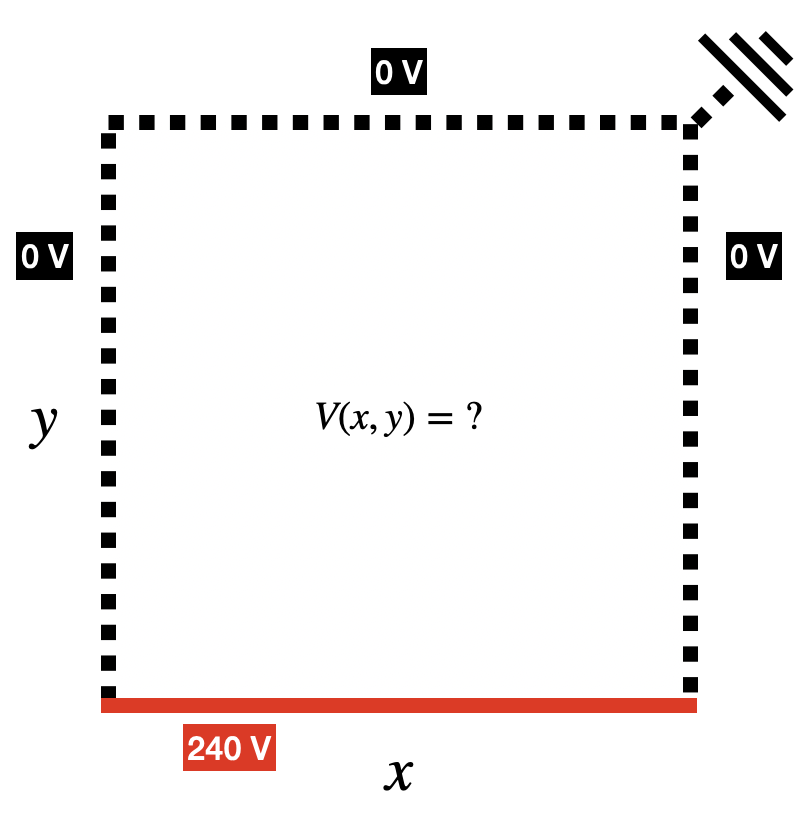

**11.1. (1 point)** Write down the finite difference approximation of the Laplace equation. Hint: Express the answer with $V_{i,j}$ on the left-hand side.

$$V_{i, j} = \frac{(\Delta x^2(V_{i+1, j}+ V_{i-1, j}) + \Delta y^{2}(V_{i, j+1}+ V_{i, j-1}))}{2(\Delta x^2 + \Delta y^{2})}$$

**11.2. (1 point)** Create an empty matrix for $V(x,y)$ and add the boundary conditions of the problem to it. Hint: A matrix with $100\times 100$ cells would be sufficient.

In [10]:
# Limits:
a = 0.4 # for x 
b = 0.4  # for y

# Step sizes
Nx = 100
Ny = 100

dx = a/Nx 
dy = b/Ny

# Vectors
x = np.arange(0, a, dx)
y = np.arange(0, b, dy)

# Grid - computational domain

X, Y = np.meshgrid(x, y)

# Empty matrix for the numerical sln

V_numer = np.zeros((Ny, Nx))


# Boundary conditions

#grounded
V_numer[0, :] = 0.
V_numer[:, 0] = 0.
V_numer[:,-1] = 0

#Constant
V_numer[-1, :] = 240

**11.3. (2 points)** Create a method that iteratively fills up the solution using the finite-difference formula that you found in item 11.1. Hint: 1000 iterations should be sufficient to capture the surface adequately.

In [11]:
# For loop to fill up the solution

coef = 0.5/(dx**2 + dy**2)

iter_number = 1000

for k in range(iter_number):

    for j in range(1, Nx -1):
        for i in range(1, Ny - 1):

            V_numer[i, j] = coef*(dx**2*(V_numer[i+1, j]\
            + V_numer[i-1, j]) + dy**2*(V_numer[i, j+1]\
            + V_numer[i, j-1]))

**11.4. (1 point)** Make a two-panel plot showing the solution for $V(x,y)$, as a surface (on left-hand side plot) and with contours projected onto the XY plane (on right-hand side plot).

Text(0, 0.5, 'y [m]')

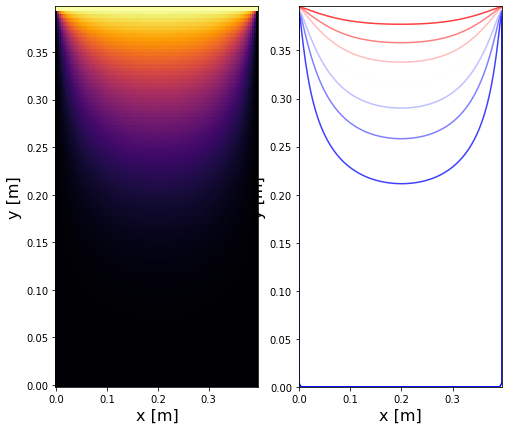

In [12]:
# Plotting

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,7))

ax1.pcolor(X, Y, V_numer, cmap = 'inferno')

ax2.contour(X, Y, V_numer, cmap='bwr')

ax1.set_xlabel('x [m]', size = 16)  # Customised labels for axes
ax1.set_ylabel('y [m]', size = 16)

ax2.set_xlabel('x [m]', size = 16)  # Customised labels for axes
ax2.set_ylabel('y [m]', size = 16)
